In [1]:
import numpy as np # Library for multi-dimensional arrays and math operations on them 
import pandas as pd # Library for data manipulation and analysis
import os # Interfacing python with the operating system
import matplotlib.pyplot as plt #Plotting library
import seaborn as sns #Plotting library with some statistical tools 
import nltk # Natural Language Processing toolkit, similar as textblob below, both have useful functions
from textblob import TextBlob
import string
import time
import re # Basically a string processing and manipulation library
from datetime import datetime ## Manipulating datetime inputs
from matplotlib.ticker import FuncFormatter
import glob
import matplotlib.pylab as pl
from ovito.io import import_file, export_file
from numba import njit
from tqdm import tqdm
from hoomd_utils import * ## custom functions

###### Data import ##########
global to_store, nk, kgrid,knorm, nkbins,Sskarr,Ssktrans,Sskbb,dr,Lmax,nbins,c_r,cr_bb,Nth,btheta,jj,totrep,mygen,Lbackbone,mybox,nparticles
os.chdir('/media/manosver/Elements/ManosVer/Denpols_extra/G3_N1000/RUN_1')
print(os.getcwd())
filename = './traj_1.gsd'
to_store = './results_' +filename[2:-4]
if os.path.isdir(to_store)==False:
    os.mkdir(to_store)
pipeline=import_file(filename)
data = pipeline.source.compute()
################################

### For analysis of structure factor ####
_sk = ctypes.CDLL('/home/manosver/Documents/GitHub/emmver/Denpols/struc_fact/libsk.so')
_sk.calc_sk.argtypes = (ctypes.c_void_p, ctypes.c_void_p, ctypes.c_void_p, ctypes.c_int, ctypes.c_int)

nk = int(np.log(10./0.001)/np.log(1.05)); print ("How many k",nk)
kgrid, knorm, nkbins= generate_kgrid_rand(nk, 0.001, 1.05)

Sskarr = np.zeros((nkbins),dtype = np.double)
Ssktrans = np.zeros((nkbins),dtype = np.double)

Sskbb = np.zeros((nkbins),dtype = np.double)

dr = 0.1;Lmax = 200.;nbins=int(Lmax/dr)
c_r = np.zeros((nbins), dtype = float)
cr_bb = np.zeros((nbins), dtype = float)

jj = -1
totrep = 0
mygen = 3
Lbackbone = 1000
mybox = data.cell[0,0]
#########################################################################

### My plotting style is inputted here #####
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
plt.rcParams["font.family"] = "Ubuntu"
plt.style.use('~/plotstyle.mplstyle')
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['xtick.major.size'] = 8 
plt.rcParams['ytick.major.size'] = 8 
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.size'] = 5 
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
#############################################







/media/manosver/Elements/ManosVer/Denpols_extra/G3_N1000/RUN_1
How many k 188


Loop 2 (long): 100%|██████████| 188/188 [00:00<00:00, 844.30it/s]


/media/manosver/Elements/ManosVer/Denpols_extra/G3_N1000/RUN_1


Norm Full Sk: 100%|██████████| 18800/18800 [00:00<00:00, 1596051.31it/s]


To Store: ./results_traj_1/G31000


Norm Backbone Sk: 100%|██████████| 18800/18800 [00:00<00:00, 1470916.94it/s]

To Store: /media/manosver/Elements/ManosVer/Denpols_extra/G3_N1000/RUN_1/results_traj_1/G31000_bb


ValueError: x and y must have same first dimension, but have shapes (354,) and (2,)

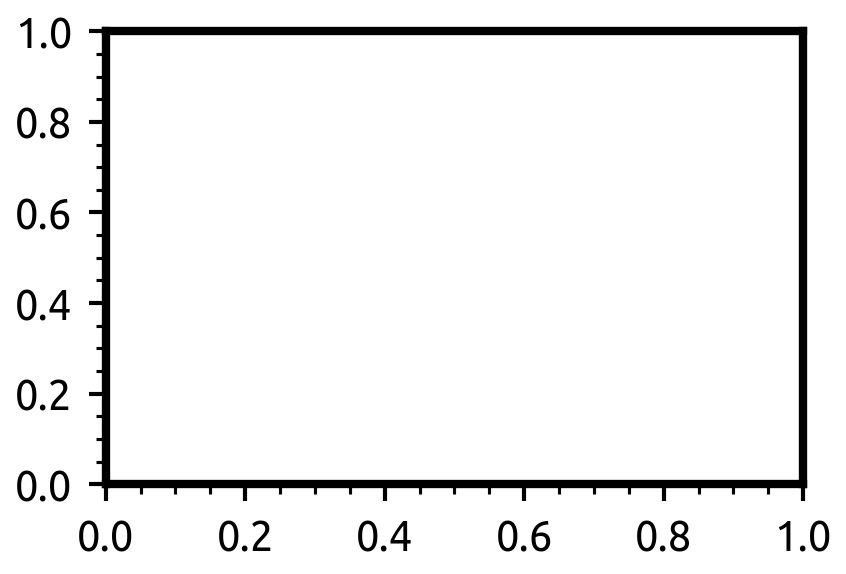

In [2]:
os.chdir('/media/manosver/Elements/ManosVer/Denpols_extra/G3_N1000/RUN_1')
print(os.getcwd())
rgsq=[]
lambda_1=[]
lambda_2=[]
lambda_3=[]
jj = -1
totrep = 0
for frame_index in tqdm(range(pipeline.source.num_frames)):
    #print("frame:",frame_index)
    data = pipeline.source.compute(frame_index)
    pos=data.particles.positions[:]
    r2=rg_tens(pos)
    rgsq.append(r2[0,0]+r2[1,1]+r2[2,2])
    lambda_1.append(r2[0,0])
    lambda_2.append(r2[1,1])
    lambda_3.append(r2[2,2])
    analyze_sk(data,Sskarr,mybox,Sskbb,kgrid,nkbins,_sk,Lbackbone)
    totrep+=1
norm_sk(totrep,Sskarr,Sskbb,Ssktrans,knorm,nkbins,mygen,Lbackbone,pos[:][:,0].size,to_store)


gyr_tens=np.vstack([np.array(rgsq),np.array(lambda_1),np.array(lambda_2),np.array(lambda_3)])
plot_shape(pipeline.source.num_frames,gyr_tens)


In [ ]:
os.chdir('/media/manosver/Elements/ManosVer/Denpols_extra/G3_N1000/RUN_1')
file="./results_traj_1/G31000"
data_w=np.genfromtxt(file)
file="./results_traj_1/G31000_bb"
data_bb=np.genfromtxt(file)
plt.logscale(data_w[:,0],data_w[:,1],'r-')
plt.logscale(data_bb[:,0],data_bb[:,1],'g-')
plt.xlabel(r'$q[\sigma^-1]')
plt.xlabel(r'$\frac{S(q)}{S(0)}')

